## Plot multiple ROC a

In [1]:
from fastai.vision.all import *
from PIL import Image, ImageOps
from fastai.vision.widgets import *

In [2]:
!nvidia-smi

Tue Aug 22 10:05:31 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti      On | 00000000:3D:00.0 Off |                  N/A |
| 32%   30C    P8               25W / 250W|      8MiB / 11264MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
torch.cuda.set_device(4)

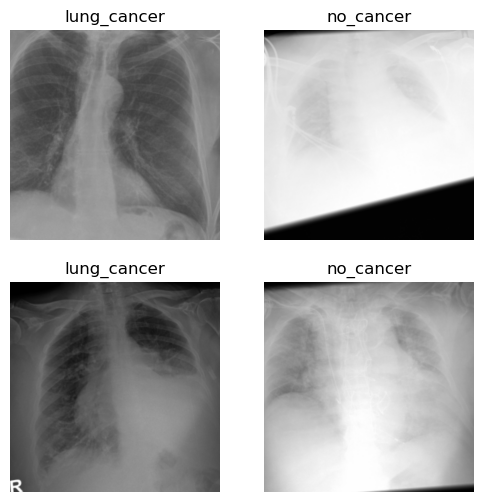

In [4]:
stats = ([0.56, 0.56, 0.56],[0.27, 0.27, 0.27])
training = Path('/data/home/xmonzonis/lung_CXR/LungX_V1/')

def HImageBlock():  # For DataBlock
    return TransformBlock(type_tfms=PILImage.create, item_tfms=[Resize(384)],
                          batch_tfms=[IntToFloatTensor, *aug_transforms(do_flip=False, size=384), Normalize.from_stats(*stats)])
dblock = DataBlock(blocks=(HImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=GrandparentSplitter(valid_name='val'),
                   get_y=parent_label)

dls = dblock.dataloaders(training, bs=8, num_workers=4)
dls.show_batch(max_n=4)

In [5]:
learn_vit = vision_learner(dls, 'vit_large_patch16_384.augreg_in21k_ft_in1k', metrics=[accuracy, RocAucBinary()], pretrained=True).to_fp16()
learn_vit = learn_vit.load('fastai2_LungCancer_v1_vitL16')

In [6]:
learn_darknet = vision_learner(dls, 'darknet53.c2ns_in1k', metrics=[accuracy, RocAucBinary()], pretrained=True)
learn_darknet = learn_darknet.load('fastai2_LungCancer_v1_darknet')

In [7]:
learn_resnet = vision_learner(dls, resnet50, metrics=[accuracy, RocAucBinary()], pretrained=True).to_fp16()
learn_resnet = learn_resnet.load('fastai2_lung_cancer_resnet_V1_res512_fit_one_cycle')

def HImageBlock():  # For DataBlock
    return TransformBlock(type_tfms=PILImage.create, item_tfms=[Resize(1024)],
                          batch_tfms=[IntToFloatTensor, *aug_transforms(do_flip=False, size=1024), Normalize.from_stats(*stats)])
dblock = DataBlock(blocks=(HImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=GrandparentSplitter(valid_name='val'),
                   get_y=parent_label)
dls_rs34 = dblock.dataloaders(training, bs=8, num_workers=4)
learn_resnet34 = vision_learner(dls_rs34, resnet34, metrics=[accuracy, RocAucBinary()], pretrained=True)
learn_resnet34 = learn_resnet34.load('fastai2_LungCancer_v1_resnet34_res1024')

/data/home/xmonzonis/.conda/envs/PyTorch_fastai_timm/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/home/xmonzonis/.conda/envs/PyTorch_fastai_timm/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/data/home/xmonzonis/.conda/envs/PyTorch_fastai_timm/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `w

In [8]:
def HImageBlock():  # For DataBlock
    return TransformBlock(type_tfms=PILImage.create, item_tfms=[Resize(512)],
                          batch_tfms=[IntToFloatTensor, *aug_transforms(do_flip=False, size=512), Normalize.from_stats(*stats)])
dblock = DataBlock(blocks=(HImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=GrandparentSplitter(valid_name='val'),
                   get_y=parent_label)
dls_dn121 = dblock.dataloaders(training, bs=16, num_workers=4)
learn_densenet = vision_learner(dls_dn121, densenet121, metrics=[accuracy, RocAucBinary()], pretrained=True).to_fp16()
learn_densenet = learn_densenet.load('fastai2_LungCancer_v1_densenet121_res512_acc')

/data/home/xmonzonis/.conda/envs/PyTorch_fastai_timm/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
def HImageBlock():  # For DataBlock
    return TransformBlock(type_tfms=PILImage.create, item_tfms=[Resize(380)],
                          batch_tfms=[IntToFloatTensor, *aug_transforms(do_flip=False, size=380), Normalize.from_stats(*stats)])
dblock_eff = DataBlock(blocks=(HImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=GrandparentSplitter(valid_name='val'),
                   get_y=parent_label)
dls_eff = dblock_eff.dataloaders(training, bs=16, num_workers=4)
learn_eff = vision_learner(dls, 'tf_efficientnet_b4.in1k', metrics=[accuracy, RocAucBinary()], pretrained=True).to_fp16()
learn_eff = learn_eff.load('fastai2_LungCancer_v1_efficientNetB4')

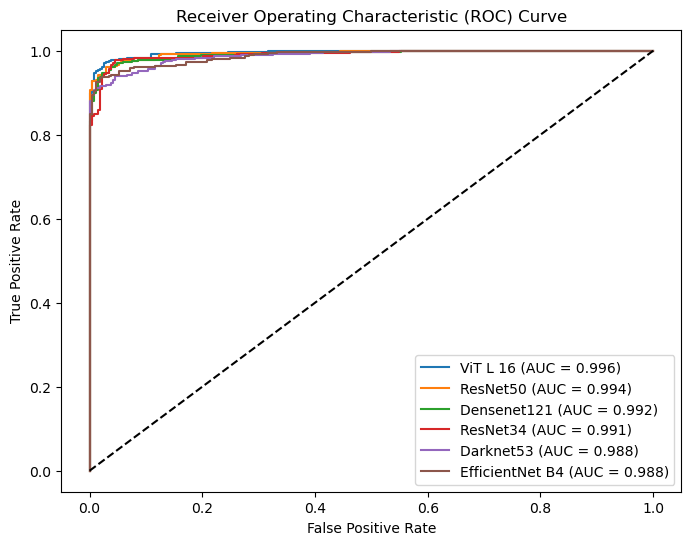

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Define model names for labeling in the plot legend
model_names = ['ViT L 16', 'ResNet50', 'ResNet34', 'Densenet121', 'Darknet53', 'EfficientNet B4']

# Load the test dataset
test_set = Path('/data/home/xmonzonis/lung_CXR/LungX_V1/test')
images_test = get_image_files(test_set)
test_dl = dls.test_dl(list(images_test), with_labels=True)
test_dl_rs34 = dls_rs34.test_dl(list(images_test), with_labels=True)
test_dl_dn121 = dls_dn121.test_dl(list(images_test), with_labels=True)

test_dl_eff = dls_eff.test_dl(list(images_test), with_labels=True)

# Get the predictions and true labels for the test dataset for each model
#preds, targets = learn.get_preds(dl=test_dl)
preds_vit, targets = learn_vit.get_preds(dl=test_dl)  # Replace with actual model predictions
preds_resnet, targets = learn_resnet.get_preds(dl=test_dl)
preds_resnet34, targets = learn_resnet34.get_preds(dl=test_dl_rs34)# Replace with predictions for ResNet50
preds_densenet, targets = learn_densenet.get_preds(dl=test_dl_dn121) # Replace with predictions for Densenet121
preds_darknet, targets = learn_darknet.get_preds(dl=test_dl)

preds_eff, targets = learn_darknet.get_preds(dl=test_dl_eff)

# Compute the AUC score for each model
auc_vit = roc_auc_score(targets, preds_vit[:, 1])
auc_resnet = roc_auc_score(targets, preds_resnet[:, 1])
auc_resnet34 = roc_auc_score(targets, preds_resnet34[:, 1])
auc_densenet = roc_auc_score(targets, preds_densenet[:, 1])
auc_darknet = roc_auc_score(targets, preds_darknet[:, 1])

auc_eff = roc_auc_score(targets, preds_eff[:, 1])

# Compute the ROC curve for each model
fpr_vit, tpr_vit, _ = roc_curve(targets, preds_vit[:, 1])
fpr_resnet, tpr_resnet, _ = roc_curve(targets, preds_resnet[:, 1])
fpr_resnet34, tpr_resnet34, _ = roc_curve(targets, preds_resnet34[:, 1])
fpr_densenet, tpr_densenet, _ = roc_curve(targets, preds_densenet[:, 1])
fpr_darknet, tpr_darknet, _ = roc_curve(targets, preds_darknet[:, 1])

fpr_eff, tpr_eff, _ = roc_curve(targets, preds_eff[:, 1])

# Plot the ROC curves for different models
plt.figure(figsize=(8, 6))
plt.plot(fpr_vit, tpr_vit, label='{} (AUC = {:.3f})'.format(model_names[0], auc_vit, alpha=1))
plt.plot(fpr_resnet, tpr_resnet, label='{} (AUC = {:.3f})'.format(model_names[1], auc_resnet, alpha=1))
plt.plot(fpr_densenet, tpr_densenet, label='{} (AUC = {:.3f})'.format(model_names[3], auc_densenet, alpha=0.2))
plt.plot(fpr_resnet34, tpr_resnet34, label='{} (AUC = {:.3f})'.format(model_names[2], auc_resnet34, alpha=0.2))

plt.plot(fpr_darknet, tpr_darknet, label='{} (AUC = {:.3f})'.format(model_names[4], auc_darknet, alpha=0.2))

plt.plot(fpr_eff, tpr_eff, label='{} (AUC = {:.3f})'.format(model_names[5], auc_eff, alpha=0.2))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


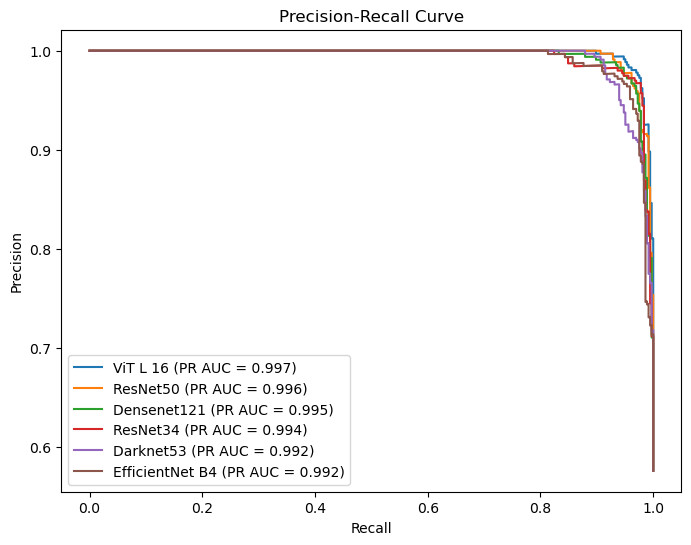

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Define model names for labeling in the plot legend
model_names = ['ViT L 16', 'ResNet50', 'ResNet34', 'Densenet121', 'Darknet53', 'EfficientNet B4']

# Load the test dataset
test_set = Path('/data/home/xmonzonis/lung_CXR/LungX_V1/test')
images_test = get_image_files(test_set)
test_dl = dls.test_dl(list(images_test), with_labels=True)
test_dl_rs34 = dls_rs34.test_dl(list(images_test), with_labels=True)
test_dl_dn121 = dls_dn121.test_dl(list(images_test), with_labels=True)

test_dl_eff = dls_eff.test_dl(list(images_test), with_labels=True)

# Get the predictions and true labels for the test dataset for each model
preds_vit, targets = learn_vit.get_preds(dl=test_dl)  # Replace with actual model predictions
preds_resnet, targets = learn_resnet.get_preds(dl=test_dl)
preds_resnet34, targets = learn_resnet34.get_preds(dl=test_dl_rs34)
preds_densenet, targets = learn_densenet.get_preds(dl=test_dl_dn121)
preds_darknet, targets = learn_darknet.get_preds(dl=test_dl)

preds_eff, targets = learn_eff.get_preds(dl=test_dl_eff)

# Compute precision-recall curve and PR AUC for each model
precision_vit, recall_vit, _ = precision_recall_curve(targets, preds_vit[:, 1])
pr_auc_vit = auc(recall_vit, precision_vit)

precision_resnet, recall_resnet, _ = precision_recall_curve(targets, preds_resnet[:, 1])
pr_auc_resnet = auc(recall_resnet, precision_resnet)

precision_resnet34, recall_resnet34, _ = precision_recall_curve(targets, preds_resnet34[:, 1])
pr_auc_resnet34 = auc(recall_resnet34, precision_resnet34)

precision_densenet, recall_densenet, _ = precision_recall_curve(targets, preds_densenet[:, 1])
pr_auc_densenet = auc(recall_densenet, precision_densenet)

precision_darknet, recall_darknet, _ = precision_recall_curve(targets, preds_darknet[:, 1])
pr_auc_darknet = auc(recall_darknet, precision_darknet)

precision_eff, recall_eff, _ = precision_recall_curve(targets, preds_eff[:, 1])
pr_auc_eff = auc(recall_eff, precision_eff)

# Plot the precision-recall curves for different models
plt.figure(figsize=(8, 6))
plt.plot(recall_vit, precision_vit, label='{} (PR AUC = {:.3f})'.format(model_names[0], pr_auc_vit, alpha=1))
plt.plot(recall_resnet, precision_resnet, label='{} (PR AUC = {:.3f})'.format(model_names[1], pr_auc_resnet, alpha=1))
plt.plot(recall_densenet, precision_densenet, label='{} (PR AUC = {:.3f})'.format(model_names[3], pr_auc_densenet, alpha=0.2))
plt.plot(recall_resnet34, precision_resnet34, label='{} (PR AUC = {:.3f})'.format(model_names[2], pr_auc_resnet34, alpha=0.2))

plt.plot(recall_darknet, precision_darknet, label='{} (PR AUC = {:.3f})'.format(model_names[4], pr_auc_darknet, alpha=0.2))
plt.plot(recall_eff, precision_eff, label='{} (PR AUC = {:.3f})'.format(model_names[5], pr_auc_eff, alpha=0.2))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
